# Predicción de una serie temporal utilizando Simple Exponential Smoothing (SES) y Redes Neuronales Artificiales 

Utilizando tensorflow 2.x

En este trabajo se busca que una red neuronal elija el mejor valor de $\alpha$ de acuerdo a los valores de la serie tempora. Siguiendo la ecuacion:

$Y_{T+1|T} = \alpha y_{T} + (1-\alpha)y_{T-1} $

En donde, $0<=\alpha<=1$ es el valor de suavización (smoothing), $y$ son las observaciones de la serie temporal, $Y_{T+1|T}$ es el valor ponderado de las observaciones $y_1, ..., y_T$ en la serie.



## Importar la base de datos a predecir y librerías

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

## Visualizar la base de datos

In [2]:
data = pd.read_csv('example.csv')
data.head()

,Date,Demand
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0, 0.5, 'Demanda')

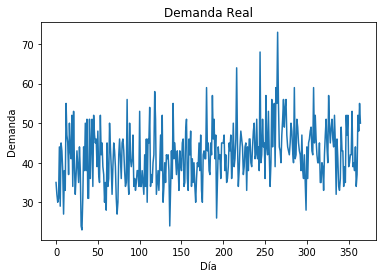

In [3]:
plt.plot(data.Demand)
plt.title('Demanda Real')
plt.xlabel('Día')
plt.ylabel('Demanda')

## Preprocesamiento

* Análisis de los diferentes valores de $\alpha = (0,1)$ 

In [4]:
data.reset_index()
data = data.drop("Date", axis=1)

In [5]:
lista_alphas=[]
lista_int=[]
lista_names=[]

for each in range (1,10):
  lista_alphas.append(each/10)
  lista_int.append(each)
  lista_names.append('A_'+str(each))

In [6]:
for valor in lista_int :
  name='A_'+str(valor)
  alpha=valor/10
  data[name]=data.Demand
  for each in range (1,data.Demand.count()):
    if each==1:
      data[name].loc[each]=data.Demand.loc[0]
    data[name].loc[each+1]=(alpha*data.Demand.loc[each])+((1-alpha)*data['A_1'].loc[each])
  data['Error_'+name]=data.Demand - data[name]
  data['Error_squared_'+name]=data['Error_'+name]*data['Error_'+name]

In [7]:
data.head()

,Demand,A_1,Error_A_1,Error_squared_A_1,A_2,Error_A_2,Error_squared_A_2,A_3,Error_A_3,Error_squared_A_3,...,Error_squared_A_6,A_7,Error_A_7,Error_squared_A_7,A_8,Error_A_8,Error_squared_A_8,A_9,Error_A_9,Error_squared_A_9
0,35,35.000,0.000,0.000000,35.000,0.000,0.000000,35.000,0.000,0.000000,...,0.000000,35.000,0.000,0.000000,35.000,0.000,0.000000,35.000,0.000,0.000000
1,32,35.000,-3.000,9.000000,35.000,-3.000,9.000000,35.000,-3.000,9.000000,...,9.000000,35.000,-3.000,9.000000,35.000,-3.000,9.000000,35.000,-3.000,9.000000
2,30,34.700,-4.700,22.090000,34.400,-4.400,19.360000,34.100,-4.100,16.810000,...,10.240000,32.900,-2.900,8.410000,32.600,-2.600,6.760000,32.300,-2.300,5.290000
3,31,34.230,-3.230,10.432900,33.760,-2.760,7.617600,33.290,-2.290,5.244100,...,0.774400,31.410,-0.410,0.168100,30.940,0.060,0.003600,30.470,0.530,0.280900
4,44,33.907,10.093,101.868649,33.584,10.416,108.493056,33.261,10.739,115.326121,...,137.077264,31.969,12.031,144.744961,31.646,12.354,152.621316,31.323,12.677,160.706329


In [8]:
data.describe()

,Demand,A_1,Error_A_1,Error_squared_A_1,A_2,Error_A_2,Error_squared_A_2,A_3,Error_A_3,Error_squared_A_3,...,Error_squared_A_6,A_7,Error_A_7,Error_squared_A_7,A_8,Error_A_8,Error_squared_A_8,A_9,Error_A_9,Error_squared_A_9
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,41.980822,41.716726,0.264096,50.217530,41.741503,0.239319,49.960597,41.766281,0.214541,50.706072,...,58.956935,41.865393,0.115429,63.712036,41.890170,0.090652,69.469544,41.914948,0.065874,76.229459
std,7.348257,3.122755,7.091231,79.218449,3.262987,7.073925,79.212186,3.542103,7.127357,80.175201,...,89.337149,5.493945,7.992103,94.834686,6.091182,8.345787,101.766922,6.710103,8.742684,110.246109
min,23.000000,33.907000,-18.128281,0.000000,33.584000,-18.447361,0.000000,33.141410,-18.766441,0.000000,...,0.000000,27.638358,-20.528380,0.000000,26.092238,-23.018920,0.000000,24.546119,-25.509460,0.000000
25%,37.000000,39.638696,-4.731228,6.414092,39.625957,-4.612842,6.144527,39.399666,-4.597273,6.306701,...,5.579546,37.775378,-5.068606,6.705861,37.584861,-5.140904,6.955108,37.198954,-5.588641,7.020612
50%,42.000000,41.476922,-0.326133,22.811862,41.531334,-0.384439,21.486420,41.474165,-0.626496,22.159277,...,23.355758,41.750783,-0.513923,24.801781,41.803586,-0.441633,26.428899,41.873532,-0.713412,29.824609
75%,46.000000,43.321923,4.776176,58.414859,43.360603,4.656526,59.997972,43.808835,4.883686,62.451186,...,71.471571,45.010815,4.745675,76.116525,45.229189,5.091434,81.780950,45.576298,5.383523,93.247488
max,73.000000,50.966458,24.979682,623.984503,53.016255,25.471467,648.795632,55.514223,26.037534,677.953158,...,769.270913,65.506095,28.301800,800.991891,68.004064,28.867867,833.353731,70.502032,29.433933,866.356434


In [9]:
data['Best_alpha']=data.Demand
for each in range (1,data.Demand.count()):
  minimo=1000
  for name in lista_names:
    min_num=data['Error_squared_'+name][each]
    if minimo>min_num:
      minimo=min_num
      min_name=(name[-1])
      data['Best_alpha'][each]=min_name

In [10]:
data['Best_alpha'][0]=0
data.head(20)

,Demand,A_1,Error_A_1,Error_squared_A_1,A_2,Error_A_2,Error_squared_A_2,A_3,Error_A_3,Error_squared_A_3,...,A_7,Error_A_7,Error_squared_A_7,A_8,Error_A_8,Error_squared_A_8,A_9,Error_A_9,Error_squared_A_9,Best_alpha
0,35,35.000000,0.000000,0.000000,35.000000,0.000000,0.000000,35.000000,0.000000,0.000000,...,35.000000,0.000000,0.000000,35.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0
1,32,35.000000,-3.000000,9.000000,35.000000,-3.000000,9.000000,35.000000,-3.000000,9.000000,...,35.000000,-3.000000,9.000000,35.000000,-3.000000,9.000000,35.000000,-3.000000,9.000000,1
2,30,34.700000,-4.700000,22.090000,34.400000,-4.400000,19.360000,34.100000,-4.100000,16.810000,...,32.900000,-2.900000,8.410000,32.600000,-2.600000,6.760000,32.300000,-2.300000,5.290000,9
3,31,34.230000,-3.230000,10.432900,33.760000,-2.760000,7.617600,33.290000,-2.290000,5.244100,...,31.410000,-0.410000,0.168100,30.940000,0.060000,0.003600,30.470000,0.530000,0.280900,8
4,44,33.907000,10.093000,101.868649,33.584000,10.416000,108.493056,33.261000,10.739000,115.326121,...,31.969000,12.031000,144.744961,31.646000,12.354000,152.621316,31.323000,12.677000,160.706329,1
5,29,34.916300,-5.916300,35.002606,35.925600,-6.925600,47.963935,36.934900,-7.934900,62.962638,...,40.972100,-11.972100,143.331178,41.981400,-12.981400,168.516746,42.990700,-13.990700,195.739686,1
6,45,34.324670,10.675330,113.962671,33.733040,11.266960,126.944388,33.141410,11.858590,140.626157,...,30.774890,14.225110,202.353755,30.183260,14.816740,219.535784,29.591630,15.408370,237.417866,1
7,43,35.392203,7.607797,57.878575,36.459736,6.540264,42.775053,37.527269,5.472731,29.950785,...,41.797401,1.202599,1.446244,42.864934,0.135066,0.018243,43.932467,-0.932467,0.869495,8
8,38,36.152983,1.847017,3.411473,36.913762,1.086238,1.179912,37.674542,0.325458,0.105923,...,40.717661,-2.717661,7.385681,41.478441,-3.478441,12.099549,42.239220,-4.239220,17.970989,3
9,27,36.337684,-9.337684,87.192351,36.522386,-9.522386,90.675838,36.707088,-9.707088,94.227555,...,37.445895,-10.445895,109.116718,37.630597,-10.630597,113.009583,37.815298,-10.815298,116.970677,1


In [11]:
data['Best_alpha']=data['Best_alpha']*0.1

In [12]:
data.head()

,Demand,A_1,Error_A_1,Error_squared_A_1,A_2,Error_A_2,Error_squared_A_2,A_3,Error_A_3,Error_squared_A_3,...,A_7,Error_A_7,Error_squared_A_7,A_8,Error_A_8,Error_squared_A_8,A_9,Error_A_9,Error_squared_A_9,Best_alpha
0,35,35.000,0.000,0.000000,35.000,0.000,0.000000,35.000,0.000,0.000000,...,35.000,0.000,0.000000,35.000,0.000,0.000000,35.000,0.000,0.000000,0.0
1,32,35.000,-3.000,9.000000,35.000,-3.000,9.000000,35.000,-3.000,9.000000,...,35.000,-3.000,9.000000,35.000,-3.000,9.000000,35.000,-3.000,9.000000,0.1
2,30,34.700,-4.700,22.090000,34.400,-4.400,19.360000,34.100,-4.100,16.810000,...,32.900,-2.900,8.410000,32.600,-2.600,6.760000,32.300,-2.300,5.290000,0.9
3,31,34.230,-3.230,10.432900,33.760,-2.760,7.617600,33.290,-2.290,5.244100,...,31.410,-0.410,0.168100,30.940,0.060,0.003600,30.470,0.530,0.280900,0.8
4,44,33.907,10.093,101.868649,33.584,10.416,108.493056,33.261,10.739,115.326121,...,31.969,12.031,144.744961,31.646,12.354,152.621316,31.323,12.677,160.706329,0.1


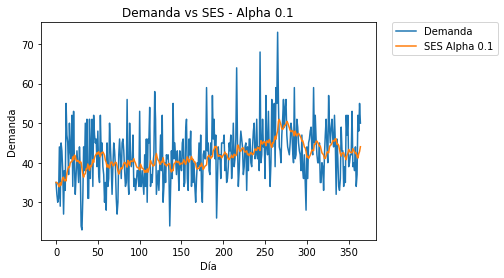

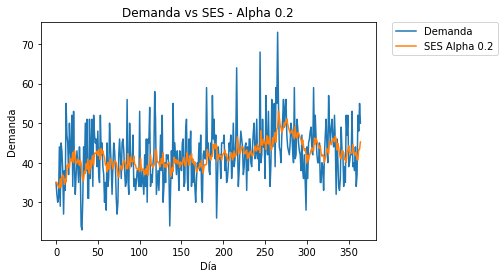

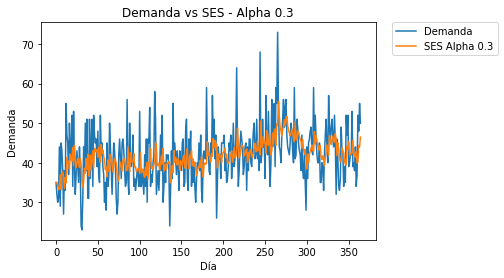

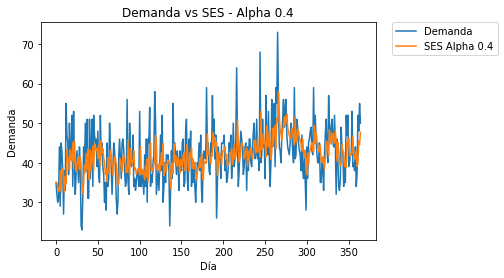

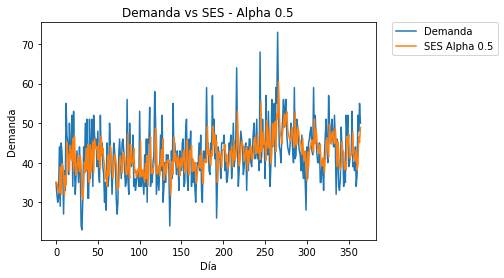

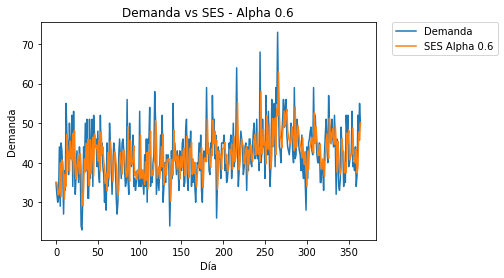

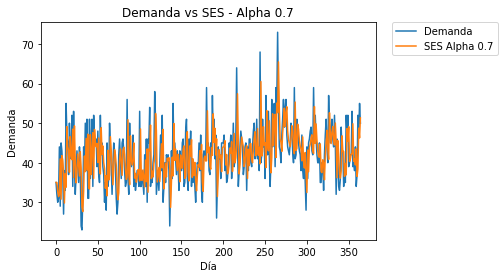

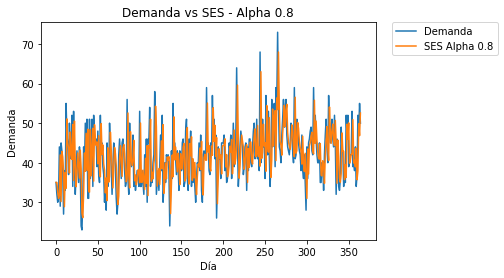

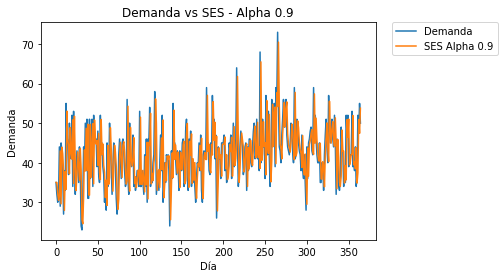

In [13]:
count=0
for name in lista_names:
  count=count+1
  plt.title('Demanda vs SES - Alpha '+str(count/10))
  plt.plot(data['Demand'], label="Demanda")    
  plt.plot(data[name], label="SES Alpha "+str(count/10))
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('Día')
  plt.ylabel('Demanda')
  plt.show()

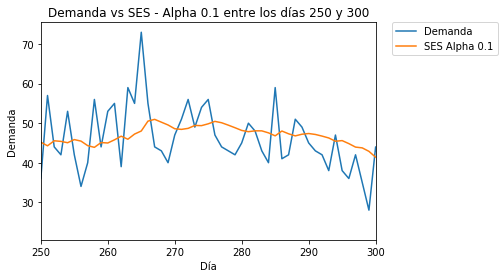

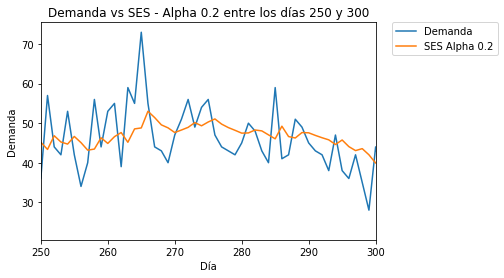

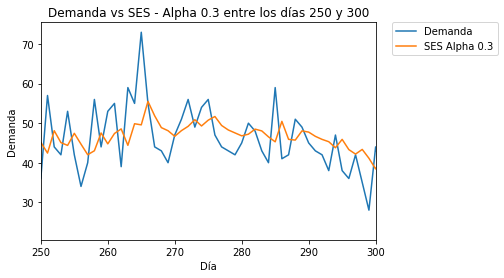

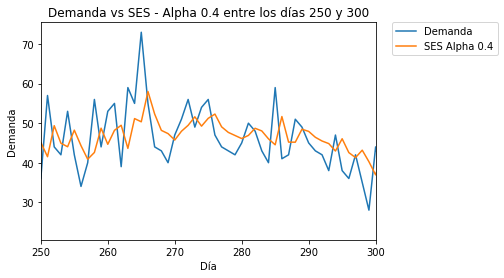

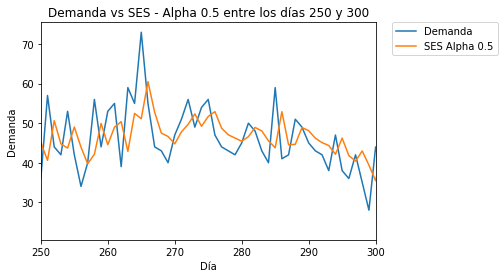

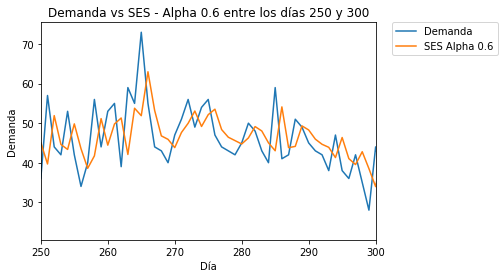

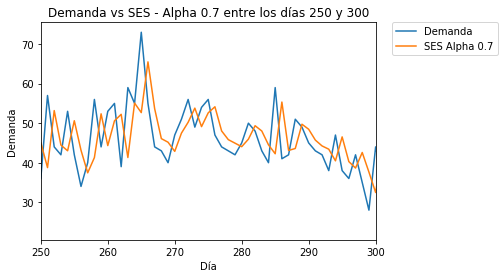

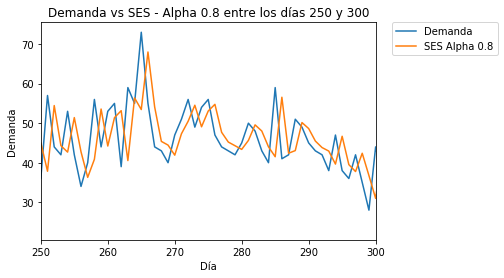

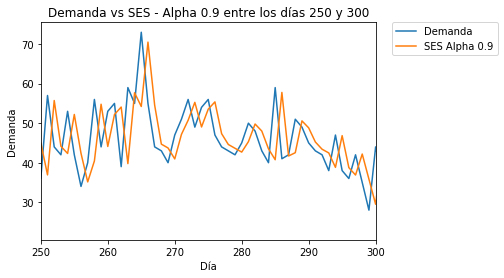

In [14]:
count=0
for name in lista_names:
  count=count+1  
  plt.title('Demanda vs SES - Alpha '+str(count/10)+' entre los días 250 y 300')
  plt.plot(data['Demand'], label="Demanda")    
  plt.plot(data[name], label="SES Alpha "+str(count/10))
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('Día')
  plt.ylabel('Demanda')
  plt.xlim([250,300])
  plt.show()

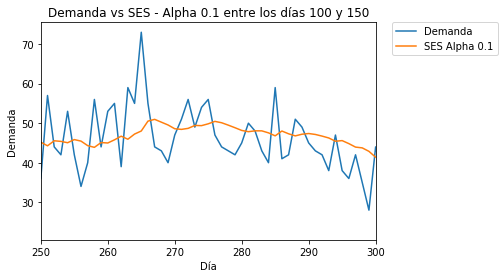

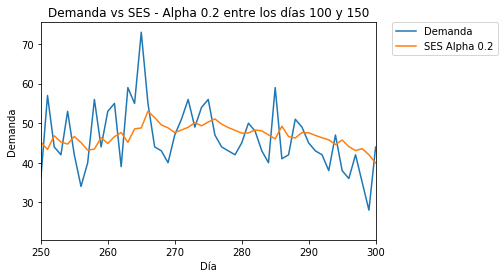

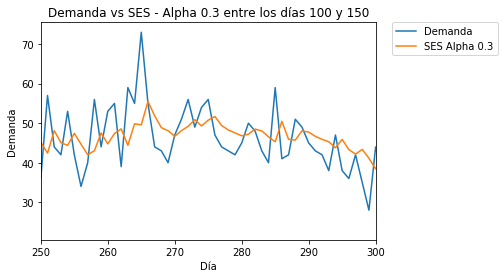

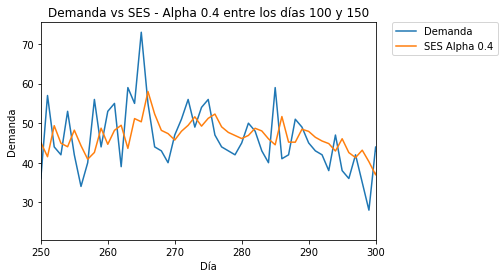

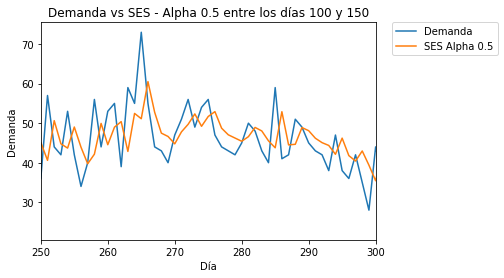

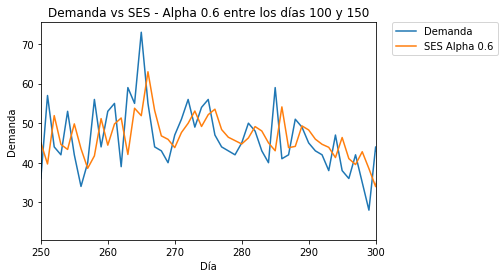

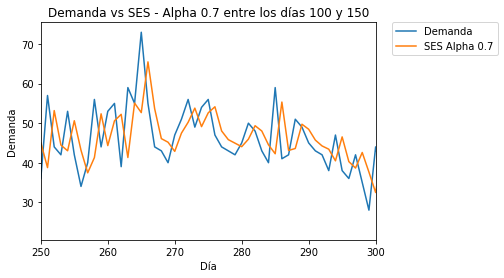

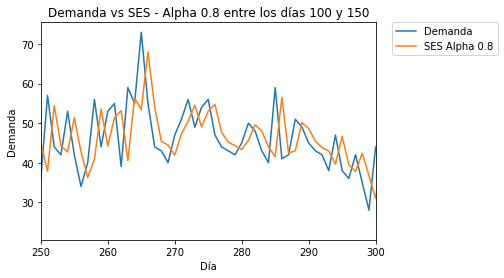

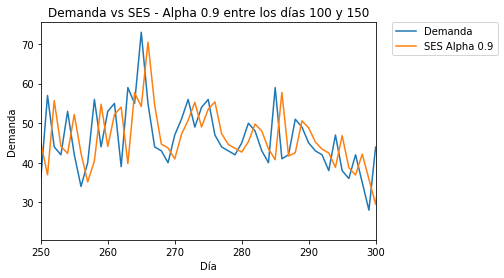

In [15]:
count=0
for name in lista_names:
  count=count+1
  plt.title('Demanda vs SES - Alpha '+str(count/10)+' entre los días 100 y 150')
  plt.plot(data['Demand'], label="Demanda")    
  plt.plot(data[name], label="SES Alpha "+str(count/10))
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('Día')
  plt.ylabel('Demanda')
  plt.xlim([250,300])
  plt.show()

In [16]:
data.describe()

,Demand,A_1,Error_A_1,Error_squared_A_1,A_2,Error_A_2,Error_squared_A_2,A_3,Error_A_3,Error_squared_A_3,...,A_7,Error_A_7,Error_squared_A_7,A_8,Error_A_8,Error_squared_A_8,A_9,Error_A_9,Error_squared_A_9,Best_alpha
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,41.980822,41.716726,0.264096,50.217530,41.741503,0.239319,49.960597,41.766281,0.214541,50.706072,...,41.865393,0.115429,63.712036,41.890170,0.090652,69.469544,41.914948,0.065874,76.229459,0.422466
std,7.348257,3.122755,7.091231,79.218449,3.262987,7.073925,79.212186,3.542103,7.127357,80.175201,...,5.493945,7.992103,94.834686,6.091182,8.345787,101.766922,6.710103,8.742684,110.246109,0.359088
min,23.000000,33.907000,-18.128281,0.000000,33.584000,-18.447361,0.000000,33.141410,-18.766441,0.000000,...,27.638358,-20.528380,0.000000,26.092238,-23.018920,0.000000,24.546119,-25.509460,0.000000,0.000000
25%,37.000000,39.638696,-4.731228,6.414092,39.625957,-4.612842,6.144527,39.399666,-4.597273,6.306701,...,37.775378,-5.068606,6.705861,37.584861,-5.140904,6.955108,37.198954,-5.588641,7.020612,0.100000
50%,42.000000,41.476922,-0.326133,22.811862,41.531334,-0.384439,21.486420,41.474165,-0.626496,22.159277,...,41.750783,-0.513923,24.801781,41.803586,-0.441633,26.428899,41.873532,-0.713412,29.824609,0.200000
75%,46.000000,43.321923,4.776176,58.414859,43.360603,4.656526,59.997972,43.808835,4.883686,62.451186,...,45.010815,4.745675,76.116525,45.229189,5.091434,81.780950,45.576298,5.383523,93.247488,0.900000
max,73.000000,50.966458,24.979682,623.984503,53.016255,25.471467,648.795632,55.514223,26.037534,677.953158,...,65.506095,28.301800,800.991891,68.004064,28.867867,833.353731,70.502032,29.433933,866.356434,0.900000


## Re-organización de datos 
## Separación de la base de datos en entrenamiento 70%, validación 20% y prueba 10%

Para dejar 3 tablas (entrenamiento, validación y prueba) con :
* IN: 12 entradas de las demandas anteriores
* OUT: 1 el mejor valor de $\alpha$ según los datos

In [17]:
lista_I=[]
lista=[]

for each in range(1,13):
  lista_I.append('I_'+str(each))
lista=lista_I
lista.append('Best_Alpha')
print(lista)

['I_1', 'I_2', 'I_3', 'I_4', 'I_5', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10', 'I_11', 'I_12', 'Best_Alpha']


In [18]:
new_data=pd.DataFrame(columns=lista)

In [19]:
new_data.head()

,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,Best_Alpha


In [20]:
temporal_table=[]
for each in range (12,data.Demand.count()-1):
  temporal_table=(data.Demand[each-12:(each)]).to_list()
  temporal_table.append(data.Best_alpha[each-1])
  new_data.loc[each] = temporal_table

In [21]:
new_data.describe()

,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,Best_Alpha
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,41.900568,41.920455,41.948864,42.014205,42.036932,42.025568,42.051136,42.048295,42.022727,42.019886,42.090909,42.119318,0.424148
std,7.365029,7.355788,7.336650,7.332348,7.310477,7.310526,7.280517,7.279558,7.292000,7.293767,7.268770,7.272277,0.359426
min,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.100000
25%,36.000000,36.750000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,0.100000
50%,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,0.200000
75%,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,0.900000
max,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,0.900000


In [22]:
new_data.head()

,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,Best_Alpha
12,35.0,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,0.1
13,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,0.1
14,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,0.6
15,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,45.0,0.8
16,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,45.0,37.0,0.1


In [23]:
Train_number=0.7
Validation_number=0.2
Test_number=0.1

Size_dataset=new_data['Best_Alpha'].count()

X_Train_data=new_data[:int(Train_number*Size_dataset)]
X_Validation_data=new_data[X_Train_data['Best_Alpha'].count()+1:int((Train_number+Validation_number)*Size_dataset)]
X_Test_data=new_data[X_Train_data['Best_Alpha'].count()+X_Validation_data['Best_Alpha'].count()+1:]

y_Train_data=new_data['Best_Alpha'][:int(Train_number*Size_dataset)]
y_Validation_data=new_data['Best_Alpha'][y_Train_data.count()+1:int((Train_number+Validation_number)*Size_dataset)]
y_Test_data=new_data['Best_Alpha'][y_Train_data.count()+y_Validation_data.count()+1:]

In [24]:
X_Train_data.columns=lista
X_Validation_data.columns=lista
X_Test_data.columns=lista

## Importar la librería para la Red neuronal - Keras

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

## Generación de la Red Neuronal Feedforward  y Compilación de la Red Neuronal 
* Optimizador: ADAM 
* Función de costo: MSE (error cuadrático médio)

* IN: 12 entradas (valores de demanda en 12 días) - capa de entrada con 12 neuronas
* LAYERS: 2 capas ocultas con 12 neuronas la primera, 6 neuronas la segunda
* OUT: 1 salida (valor del alfa deseado) - capa de salida con 1 neurona


In [27]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=12, input_dim=12))
    regressor.add(Dense(units=12))
    regressor.add(Dense(units=6))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

## Entrenamiento de la red con los datos de entrenamiento - validación con los datos de validación
* 400 épocas

In [49]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor,epochs=100)

In [50]:
results=regressor.fit(np.array(X_Train_data[lista_I[:-1]]) , np.array(y_Train_data),validation_data= (np.array(X_Validation_data[lista_I[:-1]]) , np.array(y_Validation_data)), verbose=True)

 run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/8 [==>...........................] - ETA: 0s - loss: 128.0150 - mae: 8.4312 - accuracy: 0.0000e+00WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E5443E2048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUT

Text(0, 0.5, 'Error Cuadrático Médio (MSE)')

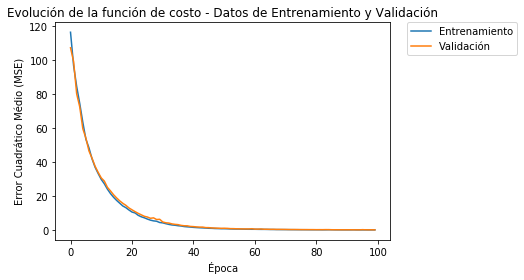

In [51]:
plt.plot(results.history['loss'], label="Entrenamiento")
plt.plot(results.history['val_loss'], label="Validación")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolución de la función de costo - Datos de Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Error Cuadrático Médio (MSE)')

Text(0, 0.5, 'Error Cuadrático Médio (MSE)')

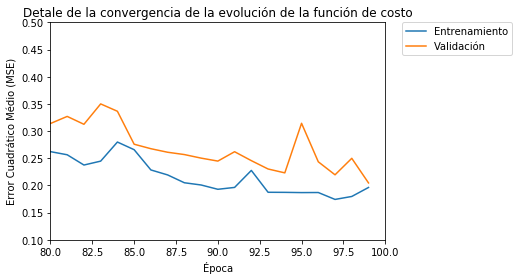

In [56]:
plt.plot(results.history['loss'], label="Entrenamiento")
plt.plot(results.history['val_loss'], label="Validación")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.1, 0.5])
plt.xlim([80, 100])
plt.title('Detale de la convergencia de la evolución de la función de costo')
plt.xlabel('Época')
plt.ylabel('Error Cuadrático Médio (MSE)')


## Test de desempeño con los datos de prueba

In [73]:
y_pred= regressor.predict(X_Test_data[lista_I[:-1]])
mse=((y_Test_data-y_pred)*(y_Test_data-y_pred)).mean()
print('El error cuadrático medio de la red entrenada con los datos de prueba es: '+ str(mse))

El error cuadrático medio de la red entrenada con los datos de prueba es: 0.14470400371685777


In [76]:
error=y_Test_data-y_pred
print('Él error medio absoluto en el conjunto de prueba es '+str(abs(error.mean())))

Él error medio absoluto en el conjunto de prueba es 0.024906784585780557


Text(0, 0.5, 'Número de veces')

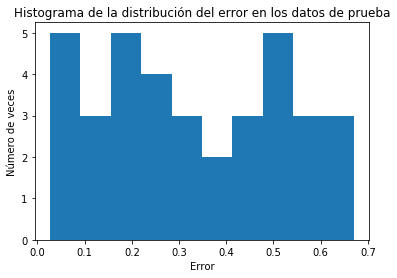

In [77]:
error=y_Test_data-y_pred
plt.hist(abs(error))
plt.title('Histograma de la distribución del error en los datos de prueba')
plt.xlabel('Error')
plt.ylabel('Número de veces')

## Implementación y prueba del modelo de Predicción basado en Single Exponential Smoothing

In [61]:
new_data.head()

,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,Best_Alpha
12,35.0,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,0.1
13,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,0.1
14,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,0.6
15,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,45.0,0.8
16,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,45.0,37.0,0.1


In [62]:
Result = pd.DataFrame()
Result['Demand']=data.Demand.loc[12:]
Result['Prediction']=data.Demand.loc[12:]
Result['Alpha']=data.Demand.loc[12:]

In [63]:
for each in range (12,data.Demand.count()-1):
  alpha=regressor.predict(np.array([data.Demand[each-12:each]]))
  Result['Alpha'].loc[each]=(alpha)
  
  Result['Prediction'].loc[each+1]=(alpha*data.Demand.loc[each])+((1-alpha)*Result['Prediction'].loc[each])

  
Result['Error']=Result.Demand - Result.Prediction
Result['Error_squared']=Result['Error']*Result['Error']

In [64]:
Result.head()

,Demand,Prediction,Alpha,Error,Error_squared
12,55,55.000000,0.136578,0.000000,0.000000
13,47,55.000000,0.595343,-8.000000,64.000000
14,45,50.237253,0.497555,-5.237253,27.428821
15,37,47.631433,0.300918,-10.631433,113.027374
16,50,44.432242,0.766413,5.567758,30.999926


In [65]:
Result.describe()

,Demand,Prediction,Alpha,Error,Error_squared
count,353.000000,353.000000,353.000000,353.000000,353.000000
mean,42.203966,42.103407,0.608888,0.100559,61.670609
std,7.289725,5.246730,2.645779,7.863566,90.614547
min,23.000000,30.178185,-0.152872,-19.242340,0.000000
25%,37.000000,38.617535,0.311749,-5.430547,7.895599
50%,42.000000,41.446112,0.490030,-0.510115,28.816381
75%,46.000000,45.512087,0.623624,5.241614,67.710777
max,73.000000,61.717727,50.000000,28.116380,790.530807


In [78]:
print('El error cuadrático medio de el SES+NN propuesto fue de : '+str(Result.describe()['Error_squared']['mean']))
for each in range(1,10):
  print('El error cuadrático medio para un alfa de '+str(each/10)+' fue de:'+str(data.describe()['Error_squared_A_'+str(each)]['mean']))

El error cuadrático medio de el SES+NN propuesto fue de : 61.67060912173858
El error cuadrático medio para un alfa de 0.1 fue de:50.21752982880545
El error cuadrático medio para un alfa de 0.2 fue de:49.96059734652286
El error cuadrático medio para un alfa de 0.3 fue de:50.706071623508464
El error cuadrático medio para un alfa de 0.4 fue de:52.453952659762294
El error cuadrático medio para un alfa de 0.5 fue de:55.20424045528433
El error cuadrático medio para un alfa de 0.6 fue de:58.956935010074595
El error cuadrático medio para un alfa de 0.7 fue de:63.71203632413307
El error cuadrático medio para un alfa de 0.8 fue de:69.46954439745977
El error cuadrático medio para un alfa de 0.9 fue de:76.22945923005469


Text(0, 0.5, 'Demanda')

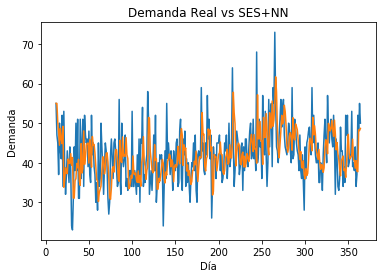

In [67]:
plt.plot(Result['Demand'])
plt.plot(Result['Prediction'])
plt.title('Demanda Real vs SES+NN')
plt.xlabel('Día')
plt.ylabel('Demanda')

Text(0, 0.5, 'Demanda')

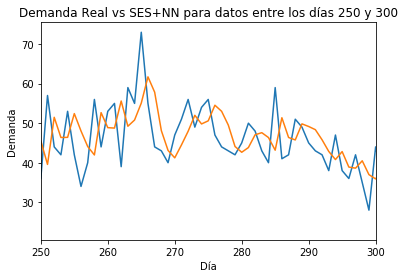

In [68]:
plt.plot(Result['Demand'])
plt.plot(Result['Prediction'])
plt.xlim([250,300])
plt.title('Demanda Real vs SES+NN para datos entre los días 250 y 300')
plt.xlabel('Día')
plt.ylabel('Demanda')

Text(0, 0.5, 'Demanda')

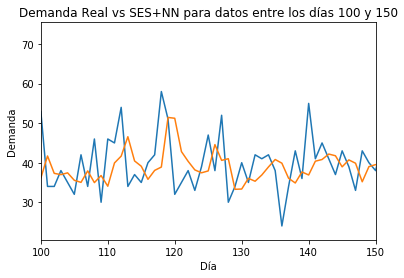

In [69]:
plt.plot(Result['Demand'])
plt.plot(Result['Prediction'])
plt.xlim([100,150])
plt.title('Demanda Real vs SES+NN para datos entre los días 100 y 150')
plt.xlabel('Día')
plt.ylabel('Demanda')